
# **Step 1 – Load and Inspect Data**

*Goal: Understand what’s inside the dataset.*

---



In [ ]:
import pandas as pd
df = pd.read_csv("train.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Check number of rows and columns
print("Dataset shape:", df.shape)

# Summary info about data types and missing values
df.info()

# Summary statistics for numerical columns
df.describe()

# Summary statistics for categorical columns
df.describe(include='object')

Dataset shape: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


# **Step 2 – Check Missing Values**

*Goal: See where data is incomplete.*


---



In [ ]:
# Missing values count per column
print(df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64




#**Step 3 – Univariate Analysis**
*Goal: Understand the distribution of individual features.*


---



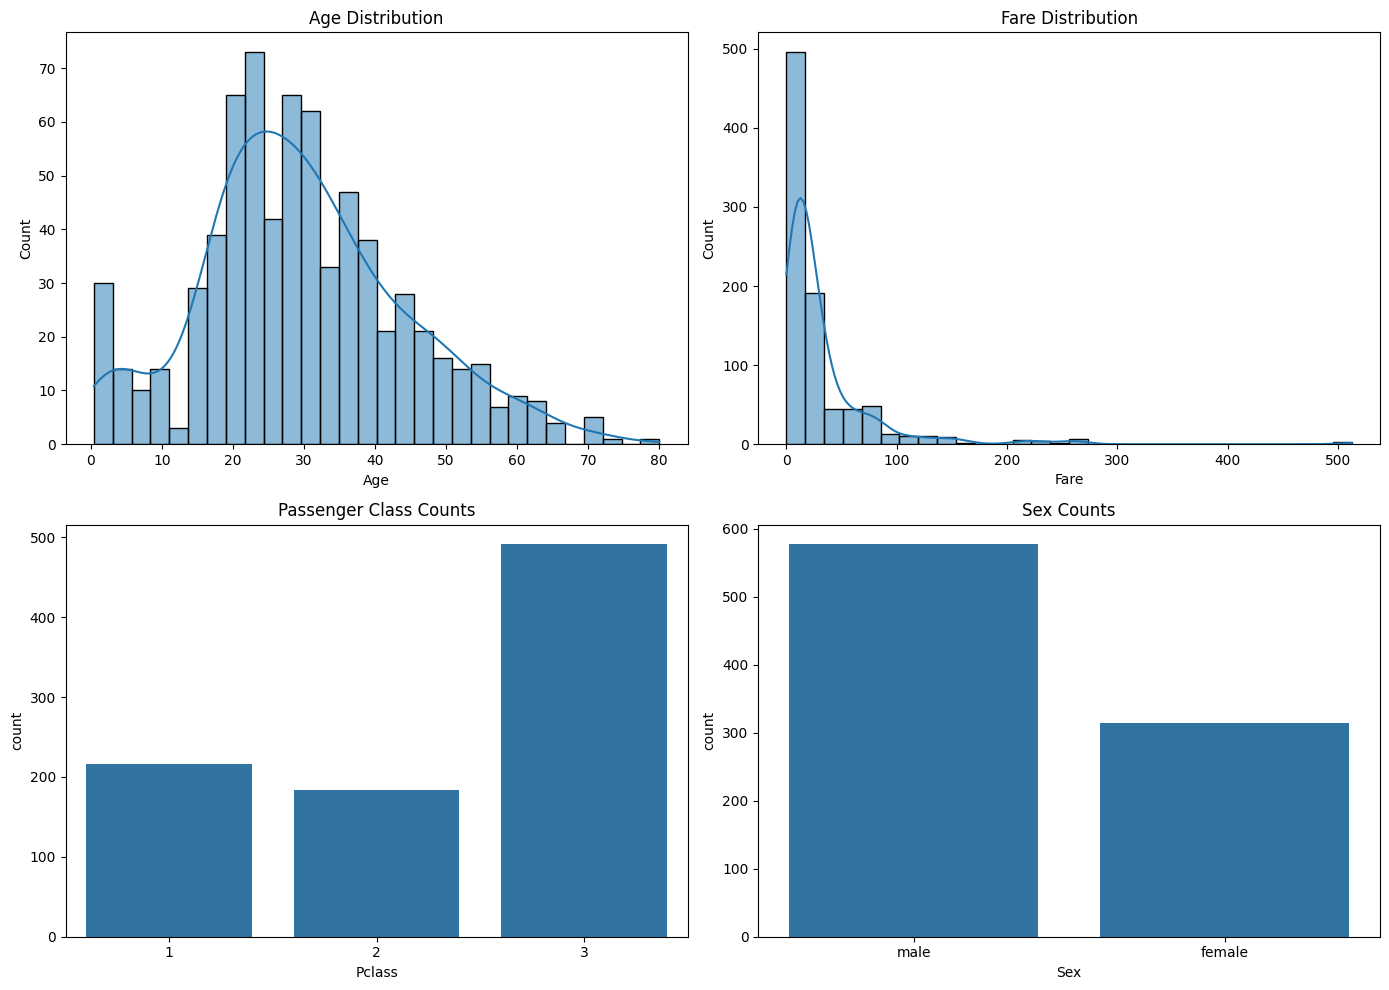

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,10))

# Age distribution (excluding missing values)
plt.subplot(2,2,1)
sns.histplot(df['Age'].dropna(), kde=True, bins=30)
plt.title('Age Distribution')

# Fare distribution
plt.subplot(2,2,2)
sns.histplot(df['Fare'], kde=True, bins=30)
plt.title('Fare Distribution')

# Passenger Class counts
plt.subplot(2,2,3)
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Counts')

# Sex counts
plt.subplot(2,2,4)
sns.countplot(x='Sex', data=df)
plt.title('Sex Counts')

plt.tight_layout()
plt.show()


*Age Distribution:*

*   The age distribution is roughly right-skewed, with most passengers between ages 20 and 40.
*   There is a noticeable peak around 22-30 years old, and fewer children or elderly passengers.

*Fare Distribution:*

*   The fare distribution is heavily right-skewed, with many passengers paying low fares close to zero.
*   A small number of passengers paid very high fares, creating a long tail on the right.

*Passenger Class Counts:*

*   The majority of passengers were in 3rd class, followed by 1st class and then 2nd class.
*   This suggests most passengers were from the lower socio-economic group.

*Sex Counts:*

*   There were significantly more male passengers than female passengers onboard.


---
---






## **Step 4 – Bivariate Analysis**

*Goal: Explore relationships between features and survival.*


---



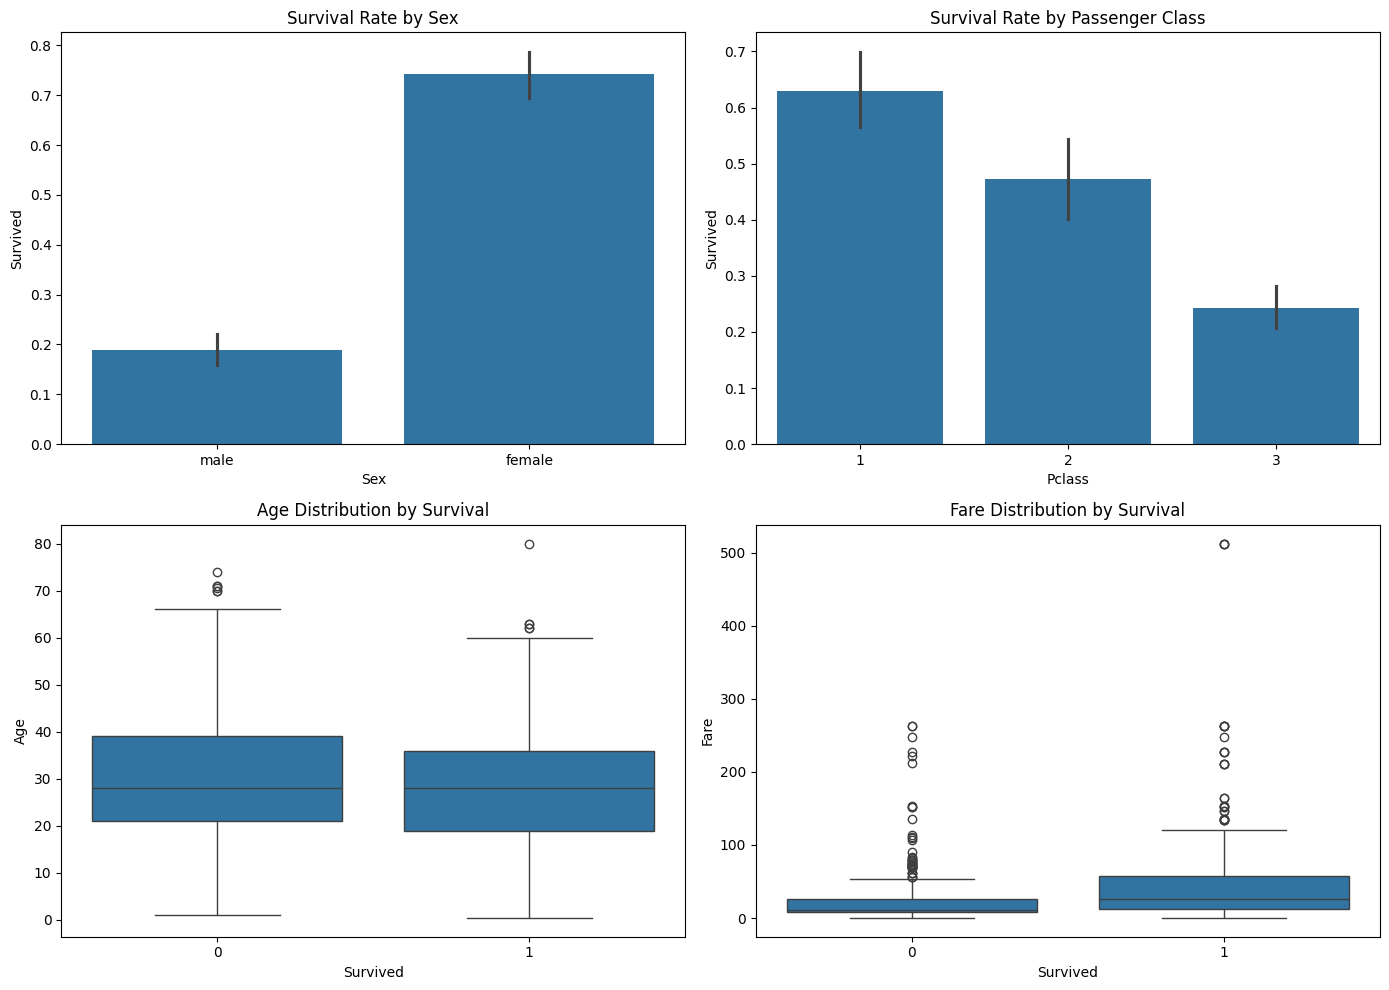

In [ ]:
plt.figure(figsize=(14,10))

# Survival rate by Sex
plt.subplot(2,2,1)
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Sex')

# Survival rate by Passenger Class
plt.subplot(2,2,2)
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')

# Age distribution by Survival
plt.subplot(2,2,3)
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival')

# Fare distribution by Survival
plt.subplot(2,2,4)
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare Distribution by Survival')

plt.tight_layout()
plt.show()


*Survival Rate by Sex:*

**Females** had a much higher survival rate than males, suggesting gender was a major factor in survival.

*Survival Rate by Passenger Class:*

Survival rate decreases with passenger class — **1st class passengers** survived more than 2nd and 3rd class.

*Age Distribution by Survival:*

Survivors tend to be **younge**r than non-survivors, indicating younger passengers had better chances of survival.

*Fare Distribution by Survival:*

Survivors generally **paid higher fares** compared to those who did not survive.


---



---



## Step 5 – Correlation & Pair Plots

Goal: Identify numeric relationships and patterns in the data.


---



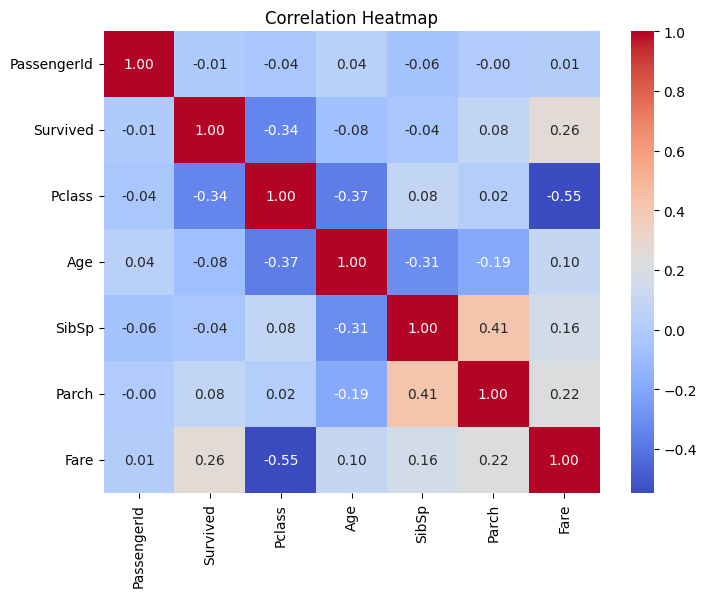

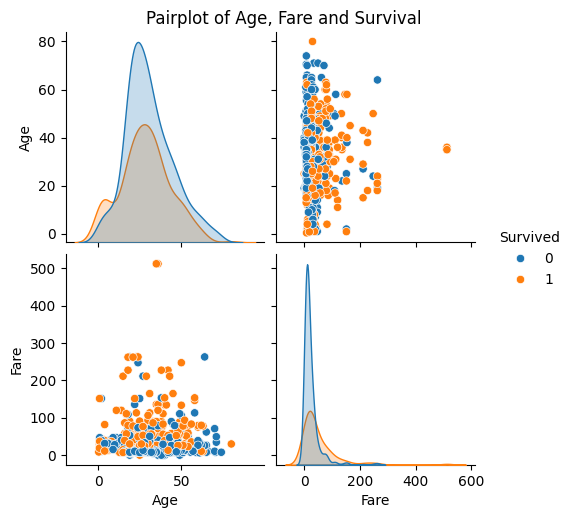

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(8,6))
numeric_cols = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Pairplot for Age, Fare and Survived (drop missing Age values)
sns.pairplot(df[['Age', 'Fare', 'Survived']].dropna(), hue='Survived')
plt.suptitle('Pairplot of Age, Fare and Survival', y=1.02)
plt.show()


*Correlation Heatmap:*

Survived correlates positively with Fare and negatively with Pclass (since 1st class is coded as 1, higher class number means lower class). Age has a weak negative correlation with survival.

*Pairplot:*

Survivors cluster around lower ages and higher fares, while non-survivors are more spread out across age and fare.


---



---



# **Summary of Findings**

* After exploring the Titanic dataset, the following key insights emerged:

* Survival by Gender: Female passengers had a significantly higher survival rate compared to males. This aligns with the “women and children first” policy during evacuation.

* Passenger Class Impact: Passengers in 1st class (Pclass = 1) had better chances of survival than those in 2nd and 3rd classes, indicating socio-economic status played an important role.

* Age Distribution: Younger passengers, especially children and young adults, were more likely to survive. The average age of survivors was lower than non-survivors.

* Fare Influence: Passengers who paid higher fares tended to survive more often, which correlates with passenger class.


* Missing Data: The Cabin column contains many missing values, making it less reliable for direct analysis. However, the presence or absence of cabin information could itself be informative.

* Embarked Port: Most passengers boarded from Southampton (S), but survival rates varied slightly by embarkation point.


---



---

